# Plot model fit comparisons for PEERS data

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mindstorm import statplot
from dcmr import framework
from dcmr import figures
from dcmr import reports

fit_dir = Path(os.environ['PEERS_FITS']) / 'simple'
fig_dir = Path(os.environ['PEERS_FIGURES']) / 'plots'

os.makedirs(fig_dir, exist_ok=True)
figures.set_style()
%matplotlib inline

## Load model fits

In [2]:
model_names = [
    'DCMR-Variable',
    'DCMR-NonInteg',
    'DCMR-NonInteg-Focused',
    'DCMR-Focused',
    'CMR-MP16-L',
]
models, temp = framework.get_sim_models('peers2', 'set2', included=model_names)
index = [model_names.index(t) for t in temp]
models = [models[i] for i in index]

xval = framework.read_model_xvals(fit_dir, models, model_names)
xval.groupby('model')['logl_test_list'].mean().sort_values()

model
DCMR-NonInteg-Focused   -21.299803
DCMR-NonInteg           -21.294740
DCMR-Variable           -21.294074
CMR-MP16-L              -21.284316
DCMR-Focused            -21.258934
Name: logl_test_list, dtype: float64

## Plot model cross-validation performance

LINO NOT subset; don't know how to subset; dropped


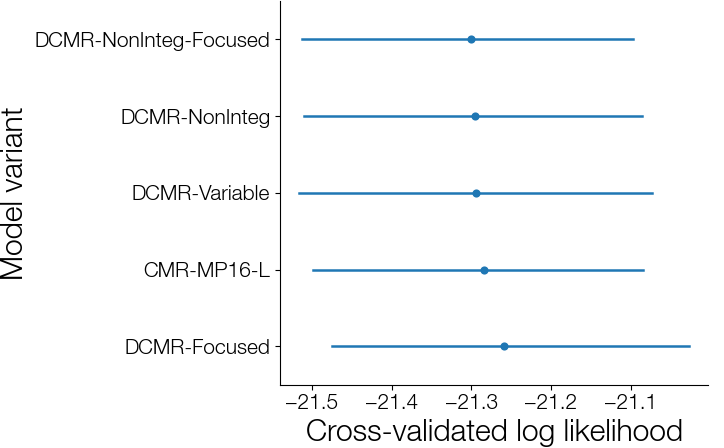

In [3]:
g = figures.plot_xval_comp(xval, aspect=1.5, height=5)
g.savefig(fig_dir / 'model_comp_xval.pdf')
None

## Plot best-fitting B parameters by sublayer

In [4]:
dark = sns.color_palette(
    'ch:start=.85, rot=3, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7677146868667069, 0.6832898635343498, 0.6227761667322436),
 (0.6959582116380986, 0.5671977683716981, 0.6924893105708751),
 (0.47235755336184604, 0.5571347744376278, 0.6432698130407366),
 (0.3704097010205724, 0.5160382140138384, 0.3930721515650498),
 (0.4361604889403601, 0.3713168195808429, 0.2769734554622078),
 (0.3783407100721391, 0.24873886348747545, 0.3434653432968093)]

In [5]:
light = sns.color_palette(
    'ch:start=.85, rot=3, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9232372258488759, 0.8135797718989244, 0.7349799281741104),
 (0.8956995853139128, 0.7126399553756866, 0.8907678242112859),
 (0.6278498977346862, 0.7606438582851401, 0.8955646869361347),
 (0.5217328362665021, 0.7780784894888304, 0.5616248915311974),
 (0.728614677102655, 0.5985568760668512, 0.4093311490099824),
 (0.7362245945415111, 0.42909989546413796, 0.6535784995332191)]

In [6]:
ur_model = models[model_names.index("DCMR-Focused")]
fit = framework.read_model_fits(fit_dir, [ur_model], ["DCMR-Focused"])
B_names = [
    'B_enc_loc',
    'B_enc_use',
    'B_rec_loc',
    'B_rec_use',
]
B_subset = pd.melt(
    fit[B_names].reset_index(),
    id_vars='subject', 
    value_vars=B_names,
    var_name='parameter',
    value_name='value',
)
fit[B_names].reset_index()

,model,subject,B_enc_loc,B_enc_use,B_rec_loc,B_rec_use
0,DCMR-Focused,63,0.363932,0.754546,0.718676,1.0
1,DCMR-Focused,64,0.010815,0.027228,0.546527,1.0
2,DCMR-Focused,65,0.460985,0.010783,0.813303,1.0
3,DCMR-Focused,66,0.667572,0.040039,0.888339,1.0
4,DCMR-Focused,67,0.767703,0.048773,0.807846,1.0
...,...,...,...,...,...,...
121,DCMR-Focused,240,0.593120,0.908754,0.853059,1.0
122,DCMR-Focused,241,0.696932,0.564802,0.697382,1.0
123,DCMR-Focused,242,0.704011,0.233361,0.918050,1.0
124,DCMR-Focused,243,0.619925,0.670872,0.724961,1.0


/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:188: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.stripplot(data=data, x=x, y=y, hue=hue, ax=ax, **point_prop, **kwargs)
/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:203: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, **bar_prop, **kwargs)
LINO NOT subset; don't know how to subset; dropped


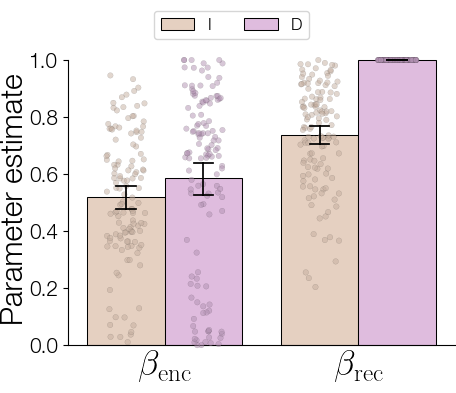

In [7]:
B_labels = [
    r'$\beta_\mathrm{enc}^{I}$',
    r'$\beta_\mathrm{enc}^{D}$',
    r'$\beta_\mathrm{rec}^{I}$',
    r'$\beta_\mathrm{rec}^{D}$',
]
B_subset['phase'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'enc',
        'B_enc_use': 'enc',
        'B_rec_loc': 'rec',
        'B_rec_use': 'rec',
    }
)
B_subset['sublayer'] = B_subset['parameter'].map(
    {
        'B_enc_loc': 'I',
        'B_enc_use': 'D',
        'B_rec_loc': 'I',
        'B_rec_use': 'D',
    }
)
fig, ax = plt.subplots(figsize=(5, 4))
statplot.plot_swarm_bar(
    B_subset,
    x='phase',
    y='value',
    hue='sublayer',
    point_kind='strip',
    light=light,
    dark=dark,
    dodge=True,
    bar_kws={'capsize': 0.2, 'clip_on': False},
    point_kws={'size': 4, 'alpha': 0.5, 'jitter': 0.2},
    legend=False,
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Parameter estimate')
ax.set_xticks(
    [0, 1], 
    [r'$\beta_\mathrm{enc}$', r'$\beta_\mathrm{rec}$'], 
    usetex=True, 
    fontfamily='helvetica',
    fontsize='x-large',
)
ax.tick_params(axis='x', length=0)
ax.set(ylim=(0, 1.08), yticks=np.arange(0, 1.2, 0.2))
ax.spines['left'].set_bounds(0, 1)
fig.legend(loc=(.3375, .9), prop={'size': 12}, ncol=3)
ax.yaxis.set_label_coords(-.1, 0.475)
fig.savefig(fig_dir / 'param_B.pdf')

## Create parameter tables

In [8]:
table, raw = reports.create_model_table(fit_dir, models, model_names, model_comp='xval')
table.to_latex(fig_dir / 'parameters_peers.tex', escape=False)
table

,DCMR-Variable,DCMR-NonInteg,DCMR-NonInteg-Focused,DCMR-Focused,CMR-MP16-L
$\phi_s$,0.11 (0.00),0.13 (0.00),0.13 (0.00),0.10 (0.00),0.16 (0.01)
$\phi_d$,0.90 (0.03),0.98 (0.04),0.98 (0.04),0.88 (0.03),0.97 (0.04)
$\beta_{\mathrm{enc}}$,---,---,---,---,0.55 (0.01)
"$\beta_{\mathrm{enc},I}$",0.51 (0.01),0.55 (0.01),0.55 (0.01),0.50 (0.01),---
"$\beta_{\mathrm{enc},D}$",0.50 (0.01),1,1,0.56 (0.01),---
$\beta_{\mathrm{start}}$,0.42 (0.01),0.43 (0.01),0.43 (0.01),0.45 (0.01),0.42 (0.01)
$\beta_{\mathrm{rec}}$,---,---,---,---,0.83 (0.00)
"$\beta_{\mathrm{rec},I}$",0.76 (0.01),0.83 (0.00),0.83 (0.00),0.73 (0.01),---
"$\beta_{\mathrm{rec},D}$",0.70 (0.01),0.41 (0.01),1,1,---
$\theta_s$,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)


In [9]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.5.0

dcmr      : 1.0.0a0
matplotlib: 3.10.5
pandas    : 2.3.2
mindstorm : 0.11.2
seaborn   : 0.13.2
numpy     : 2.1.3

